In [47]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [49]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [50]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


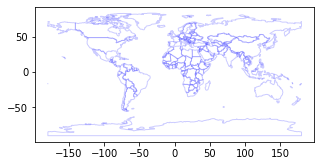

In [51]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
world.plot(ax=ax,color='w',ec='b',alpha=0.2)
plt.show()

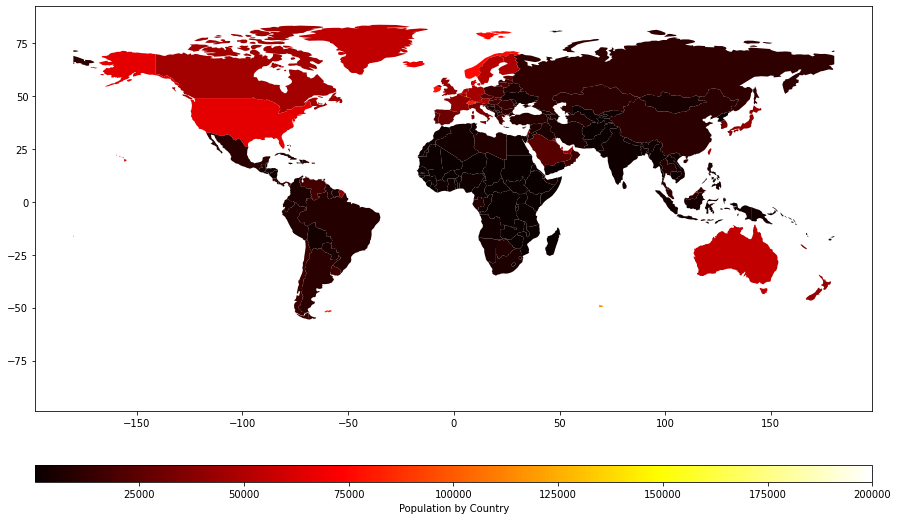

In [52]:
world['GDP_per_capita']=world['gdp_md_est']/world['pop_est']*10**6

fig,ax=plt.subplots(1,1,figsize=(15,10))
world.plot(ax=ax,column='GDP_per_capita',cmap='hot',legend=True,legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal",'pad':0.1,'aspect':50})
plt.show()

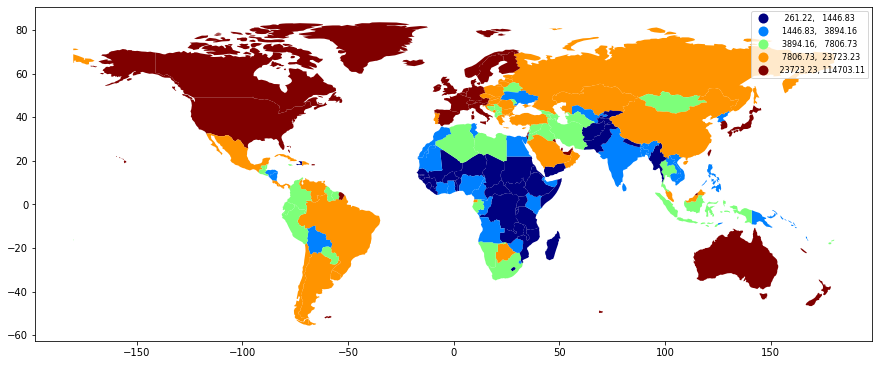

In [53]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
world[world['name']!='Antarctica'].plot(ax=ax,column='GDP_per_capita',cmap='jet',legend=True,scheme='quantiles',legend_kwds={'fontsize':8})
plt.show()

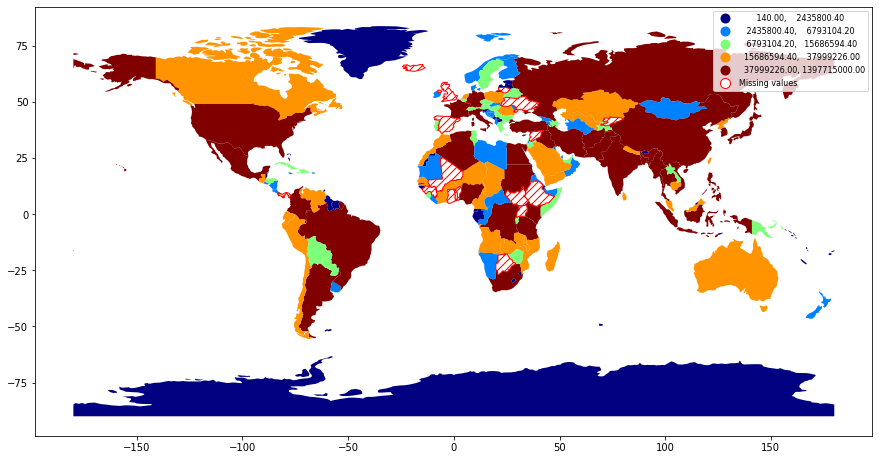

In [54]:
import numpy as np

world.loc[np.random.choice(world.index, 20), 'pop_est'] = np.nan

fig,ax=plt.subplots(1,1,figsize=(15,8))
world.plot(ax=ax,column='pop_est',cmap='jet',legend=True,scheme='quantiles', missing_kwds={
        "color": "white",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },legend_kwds={'fontsize':8})
plt.show()

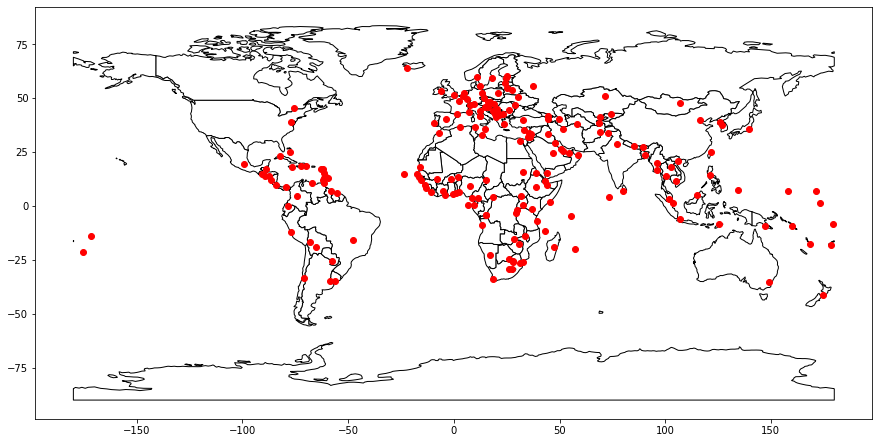

In [55]:
base = world.plot(color='w', edgecolor='black',figsize=(15,8))

cities.plot(ax=base, marker='o', color='red')
plt.show()

In [56]:
np.random.choice(world.index,40)

array([148,  46,  79,  50,  90, 109,  13,  59,  38, 105, 104,  86,  49,
       127, 116, 174, 165,  10, 103, 105, 138, 144, 142, 149,  73,  90,
       103,   3,  17, 144, 105,  74,  18, 121,  48, 113, 176,  84, 154,
       176], dtype=int64)

In [57]:
world.columns.get_loc('name')

2

In [58]:
index=world.index[world['continent']=='Africa'].to_list()
index[:5]
#index.index(68)

[1, 2, 11, 12, 13]

In [59]:
world[world.index.isin([1,2])]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,GDP_per_capita
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1089.156033
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1503.515109
